# Data Loading

In [17]:
import numpy as np
import pandas as pd


folder = 'data/'

In [18]:
# data Section -1 The Basics:
MTeams = pd.read_csv(folder+'MTeams.csv')
WTeams = pd.read_csv(folder+'WTeams.csv')
MSeasons = pd.read_csv(folder+'MSeasons.csv')
WSeasons = pd.read_csv(folder+'WSeasons.csv')
MNCAATourneySeeds = pd.read_csv(folder+'MNCAATourneySeeds.csv')
WNCAATourneySeeds = pd.read_csv(folder+'WNCAATourneySeeds.csv')

# data Section -2 Team Box Scores:
MRegualarSeasonCompactResults = pd.read_csv(folder+'MRegularSeasonCompactResults.csv')
WRegualrSeasonCompactResults = pd.read_csv(folder+'WRegularSeasonCompactResults.csv')

MNCAATourneyCompactResults = pd.read_csv(folder+'MNCAATourneyCompactResults.csv')
WNCAATourneyCompactResults = pd.read_csv(folder+'WNCAATourneyCompactResults.csv')

MRegularSeasonDetailedResults = pd.read_csv(folder+'MRegularSeasonDetailedResults.csv')
WRegularSeasonDetailedResults = pd.read_csv(folder+'WRegularSeasonDetailedResults.csv')

MNCAATourneyDetailedResults = pd.read_csv(folder+'MNCAATourneyDetailedResults.csv')
WNCAATourneyDetailedResults = pd.read_csv(folder+'WNCAATourneyDetailedResults.csv')

#Data Section -3 Geography:
Cities = pd.read_csv(folder+'Cities.csv')

MGAameCities = pd.read_csv(folder+'MGameCities.csv')
WGameCities = pd.read_csv(folder+'WGameCities.csv')

#Data Section -4 Public Rankings:
MMasseyOrdinals = pd.read_csv(folder+'MMasseyOrdinals.csv')

#Data Section -5 Supplements:
MTeamCoaches = pd.read_csv(folder+'MTeamCoaches.csv')

Conferences = pd.read_csv(folder+'Conferences.csv')

MTeamConferences = pd.read_csv(folder+'MTeamConferences.csv')
WTeamConferences = pd.read_csv(folder+'WTeamConferences.csv')

MConferenceTourneyGames = pd.read_csv(folder+'MConferenceTourneyGames.csv')

MSecondaryTourneyTeams = pd.read_csv(folder+'MSecondaryTourneyTeams.csv')

MSecondaryTourneyCompactResults = pd.read_csv(folder+'MSecondaryTourneyCompactResults.csv')

MTeamSpellings = pd.read_csv(folder+'MTeamSpellings.csv', encoding='latin1')
WTeamSpellings = pd.read_csv(folder+'WTeamSpellings.csv', encoding='latin1')

MCAATourneySlots = pd.read_csv(folder+'MNCAATourneySlots.csv')
WCAATourneySlots = pd.read_csv(folder+'WNCAATourneySlots.csv')

MCAATourneySeedRoundSlots = pd.read_csv(folder+'MNCAATourneySeedRoundSlots.csv')

# Data Section -6 Others:
# tourney_seeds_2024 = pd.read_csv(folder+'tourney_seeds_2024.csv')


sample_submission = pd.read_csv(folder+'SampleSubmissionStage1.csv')

In [5]:
print(MRegularSeasonDetailedResults.columns.values)

['Season' 'DayNum' 'WTeamID' 'WScore' 'LTeamID' 'LScore' 'WLoc' 'NumOT'
 'WFGM' 'WFGA' 'WFGM3' 'WFGA3' 'WFTM' 'WFTA' 'WOR' 'WDR' 'WAst' 'WTO'
 'WStl' 'WBlk' 'WPF' 'LFGM' 'LFGA' 'LFGM3' 'LFGA3' 'LFTM' 'LFTA' 'LOR'
 'LDR' 'LAst' 'LTO' 'LStl' 'LBlk' 'LPF']


# Choosing Columns for Regular and Tourney.
# Arranging the data with TeamID

In [ ]:
# For Regular Data
WinTeams = pd.DataFrame()
LoseTeams = pd.DataFrame()

columns = ['Season', 'TeamID', 'Points', 'Loc', 'NumOT', 'FGM', 'FGA','FGM3', 'FGA3', 'FTM', 'FTA',
       'OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF']
WinTeams[columns] = MRegularSeasonDetailedResults[['Season', 'WTeamID', 'WScore',
       'WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA',
       'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF']]

# Loc data modified
def change_loc_win(loc):
    if loc == 'H':
        return 1
    elif loc == 'A':
        return -1
    else:
        return 0
    

WinTeams['Loc'] = WinTeams['Loc'].apply(change_loc_win)

# Result data added
WinTeams['Result'] = 1

LoseTeams[columns] = MRegularSeasonDetailedResults[['Season', 'LTeamID', 'LScore',
       'WLoc', 'NumOT', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA',
       'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF']]

# Loc data modified
def change_loc_lose(loc):
    if loc == 'H':
        return -1
    elif loc == 'A':
        return 1
    else:
        return 0
    
LoseTeams['Loc'] = LoseTeams['Loc'].apply(change_loc_lose)

# Result data added
LoseTeams['Result'] = 0

RegularTeams = pd.concat([WinTeams, LoseTeams])

display(RegularTeams.head())


,Season,TeamID,Points,Loc,NumOT,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,Result
0,2003,1104,68,0,0,27,58,3,14,11,18,14,24,13,23,7,1,22,1
1,2003,1272,70,0,0,26,62,8,20,10,19,15,28,16,13,4,4,18,1
2,2003,1266,73,0,0,24,58,8,18,17,29,17,26,15,10,5,2,25,1
3,2003,1296,56,0,0,18,38,3,9,17,31,6,19,11,12,14,2,18,1
4,2003,1400,77,0,0,30,61,6,14,11,13,17,22,12,14,4,4,20,1


In [ ]:
# For Tourney Data
WinTeams = pd.DataFrame()
LoseTeams = pd.DataFrame()

columns = ['Season', 'TeamID', 'Points', 'Loc', 'NumOT', 'FGM', 'FGA','FGM3', 'FGA3', 'FTM', 'FTA',
       'OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF', 'OppID']

WinTeams[columns] = MNCAATourneyDetailedResults[['Season', 'WTeamID', 'WScore',
       'WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA',
       'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LTeamID']]

# Loc data modified
def change_loc_win(loc):
    if loc == 'H':
        return 1
    elif loc == 'A':
        return -1
    else:
        return 0
    

WinTeams['Loc'] = WinTeams['Loc'].apply(change_loc_win)

# Result data added
WinTeams['Result'] = 1


LoseTeams[columns] = MNCAATourneyDetailedResults[['Season', 'LTeamID', 'LScore',
       'WLoc', 'NumOT', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA',
       'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF', 'WTeamID']]

# Loc data modified
def change_loc_lose(loc):
    if loc == 'H':
        return -1
    elif loc == 'A':
        return 1
    else:
        return 0
    
LoseTeams['Loc'] = LoseTeams['Loc'].apply(change_loc_lose)

# Result data added
LoseTeams['Result'] = 0

TourneyTeams = pd.concat([WinTeams, LoseTeams])

display(TourneyTeams.head())

,Season,TeamID,Points,Loc,NumOT,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,OppID,Result
0,2003,1421,92,0,1,32,69,11,29,17,26,14,30,17,12,5,3,22,1411,1
1,2003,1112,80,0,0,31,66,7,23,11,14,11,36,22,16,10,7,8,1436,1
2,2003,1113,84,0,0,31,59,6,14,16,22,10,27,18,9,7,4,19,1272,1
3,2003,1141,79,0,0,29,53,3,7,18,25,11,20,15,18,13,1,19,1166,1
4,2003,1143,76,0,1,27,64,7,20,15,23,18,20,17,13,8,2,14,1301,1


# Filter MTeams to get only teams with LastD1Season == 2025

In [21]:
# Filter MTeams to get only teams with LastD1Season == 2025
valid_teams = set(MTeams[MTeams['LastD1Season'] == 2025]['TeamID'])

# Function to filter teams
def filter_teams(df):
    return df[df['TeamID'].isin(valid_teams)]

FilteredRegularTeams = pd.DataFrame()
FilteredTourneyTeams = pd.DataFrame()

# Apply filtering
FilteredRegularTeams = filter_teams(RegularTeams)
FilteredTourneyTeams = filter_teams(TourneyTeams)

display(FilteredRegularTeams)
display(FilteredTourneyTeams)

,Season,TeamID,Points,Loc,NumOT,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,Result
0,2003,1104,68,0,0,27,58,3,14,11,18,14,24,13,23,7,1,22,1
1,2003,1272,70,0,0,26,62,8,20,10,19,15,28,16,13,4,4,18,1
2,2003,1266,73,0,0,24,58,8,18,17,29,17,26,15,10,5,2,25,1
3,2003,1296,56,0,0,18,38,3,9,17,31,6,19,11,12,14,2,18,1
4,2003,1400,77,0,0,30,61,6,14,11,13,17,22,12,14,4,4,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117743,2025,1102,62,-1,0,23,49,7,23,9,17,2,24,12,8,3,3,24,0
117744,2025,1139,63,-1,0,24,55,6,23,9,14,4,31,12,20,5,2,12,0
117745,2025,1480,62,-1,0,27,61,4,18,4,8,6,23,13,13,2,2,18,0
117746,2025,1122,68,-1,0,20,59,11,32,17,22,7,22,12,10,2,5,17,0


,Season,TeamID,Points,Loc,NumOT,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,OppID,Result
0,2003,1421,92,0,1,32,69,11,29,17,26,14,30,17,12,5,3,22,1411,1
1,2003,1112,80,0,0,31,66,7,23,11,14,11,36,22,16,10,7,8,1436,1
2,2003,1113,84,0,0,31,59,6,14,16,22,10,27,18,9,7,4,19,1272,1
3,2003,1141,79,0,0,29,53,3,7,18,25,11,20,15,18,13,1,19,1166,1
4,2003,1143,76,0,1,27,64,7,20,15,23,18,20,17,13,8,2,14,1301,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,2024,1181,64,0,0,19,59,5,20,21,26,10,27,11,9,4,5,23,1301,0
1378,2024,1397,66,0,0,24,62,11,26,7,11,6,17,17,6,8,4,25,1345,0
1379,2024,1104,72,0,0,26,58,11,23,9,11,7,21,9,7,2,5,15,1163,0
1380,2024,1301,50,0,0,21,57,5,19,3,4,6,22,10,11,8,3,13,1345,0


In [22]:
FilteredRegularTeams = RegularTeams
FilteredTourneyTeams = TourneyTeams

# Adding seed to FilteredTourneyTeams

In [23]:
# Adding seed to FilteredTourneyTeams
seed_dict = MNCAATourneySeeds.set_index(['Season', 'TeamID'])

# Add WinSeed and LoseSeed to FilteredTourneyTeams in columns called 'WinSeed' and 'LoseSeed'
def extract_seed(seed):
    if len(seed) == 4:
        return int(seed[1:-1])
    else:
        return int(seed[1:])

FilteredTourneyTeams.loc[:, 'TeamSeed'] = FilteredTourneyTeams.apply(lambda x: extract_seed(seed_dict.loc[(x['Season'], x['TeamID'])]['Seed']), axis=1)
FilteredTourneyTeams.loc[:, 'OppSeed'] = FilteredTourneyTeams.apply(lambda x: extract_seed(seed_dict.loc[(x['Season'], x['OppID'])]['Seed']), axis=1)

display(FilteredTourneyTeams)


,Season,TeamID,Points,Loc,NumOT,FGM,FGA,FGM3,FGA3,FTM,...,DR,Ast,TO,Stl,Blk,PF,OppID,Result,TeamSeed,OppSeed
0,2003,1421,92,0,1,32,69,11,29,17,...,30,17,12,5,3,22,1411,1,16,16
1,2003,1112,80,0,0,31,66,7,23,11,...,36,22,16,10,7,8,1436,1,1,16
2,2003,1113,84,0,0,31,59,6,14,16,...,27,18,9,7,4,19,1272,1,10,7
3,2003,1141,79,0,0,29,53,3,7,18,...,20,15,18,13,1,19,1166,1,11,6
4,2003,1143,76,0,1,27,64,7,20,15,...,20,17,13,8,2,14,1301,1,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,2024,1181,64,0,0,19,59,5,20,21,...,27,11,9,4,5,23,1301,0,4,11
1378,2024,1397,66,0,0,24,62,11,26,7,...,17,17,6,8,4,25,1345,0,2,1
1379,2024,1104,72,0,0,26,58,11,23,9,...,21,9,7,2,5,15,1163,0,4,1
1380,2024,1301,50,0,0,21,57,5,19,3,...,22,10,11,8,3,13,1345,0,11,1


In [24]:
# From FilteredTourneyTeams add a new column to it called SeedDiff where SeedDiff =  TeamSeed - OppSeed
FilteredTourneyTeams.loc[:, 'SeedDiff'] = FilteredTourneyTeams['TeamSeed'] - FilteredTourneyTeams['OppSeed']

display(FilteredTourneyTeams)

,Season,TeamID,Points,Loc,NumOT,FGM,FGA,FGM3,FGA3,FTM,...,Ast,TO,Stl,Blk,PF,OppID,Result,TeamSeed,OppSeed,SeedDiff
0,2003,1421,92,0,1,32,69,11,29,17,...,17,12,5,3,22,1411,1,16,16,0
1,2003,1112,80,0,0,31,66,7,23,11,...,22,16,10,7,8,1436,1,1,16,-15
2,2003,1113,84,0,0,31,59,6,14,16,...,18,9,7,4,19,1272,1,10,7,3
3,2003,1141,79,0,0,29,53,3,7,18,...,15,18,13,1,19,1166,1,11,6,5
4,2003,1143,76,0,1,27,64,7,20,15,...,17,13,8,2,14,1301,1,8,9,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,2024,1181,64,0,0,19,59,5,20,21,...,11,9,4,5,23,1301,0,4,11,-7
1378,2024,1397,66,0,0,24,62,11,26,7,...,17,6,8,4,25,1345,0,2,1,1
1379,2024,1104,72,0,0,26,58,11,23,9,...,9,7,2,5,15,1163,0,4,1,3
1380,2024,1301,50,0,0,21,57,5,19,3,...,10,11,8,3,13,1345,0,11,1,10


In [25]:
# From FilteredTourneyTeams drop OppID TeamSeed and OppSeed
FilteredTourneyTeams = FilteredTourneyTeams.drop(columns=['OppID', 'TeamSeed', 'OppSeed'])

display(FilteredTourneyTeams)

,Season,TeamID,Points,Loc,NumOT,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,Result,SeedDiff
0,2003,1421,92,0,1,32,69,11,29,17,26,14,30,17,12,5,3,22,1,0
1,2003,1112,80,0,0,31,66,7,23,11,14,11,36,22,16,10,7,8,1,-15
2,2003,1113,84,0,0,31,59,6,14,16,22,10,27,18,9,7,4,19,1,3
3,2003,1141,79,0,0,29,53,3,7,18,25,11,20,15,18,13,1,19,1,5
4,2003,1143,76,0,1,27,64,7,20,15,23,18,20,17,13,8,2,14,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,2024,1181,64,0,0,19,59,5,20,21,26,10,27,11,9,4,5,23,0,-7
1378,2024,1397,66,0,0,24,62,11,26,7,11,6,17,17,6,8,4,25,0,1
1379,2024,1104,72,0,0,26,58,11,23,9,11,7,21,9,7,2,5,15,0,3
1380,2024,1301,50,0,0,21,57,5,19,3,4,6,22,10,11,8,3,13,0,10


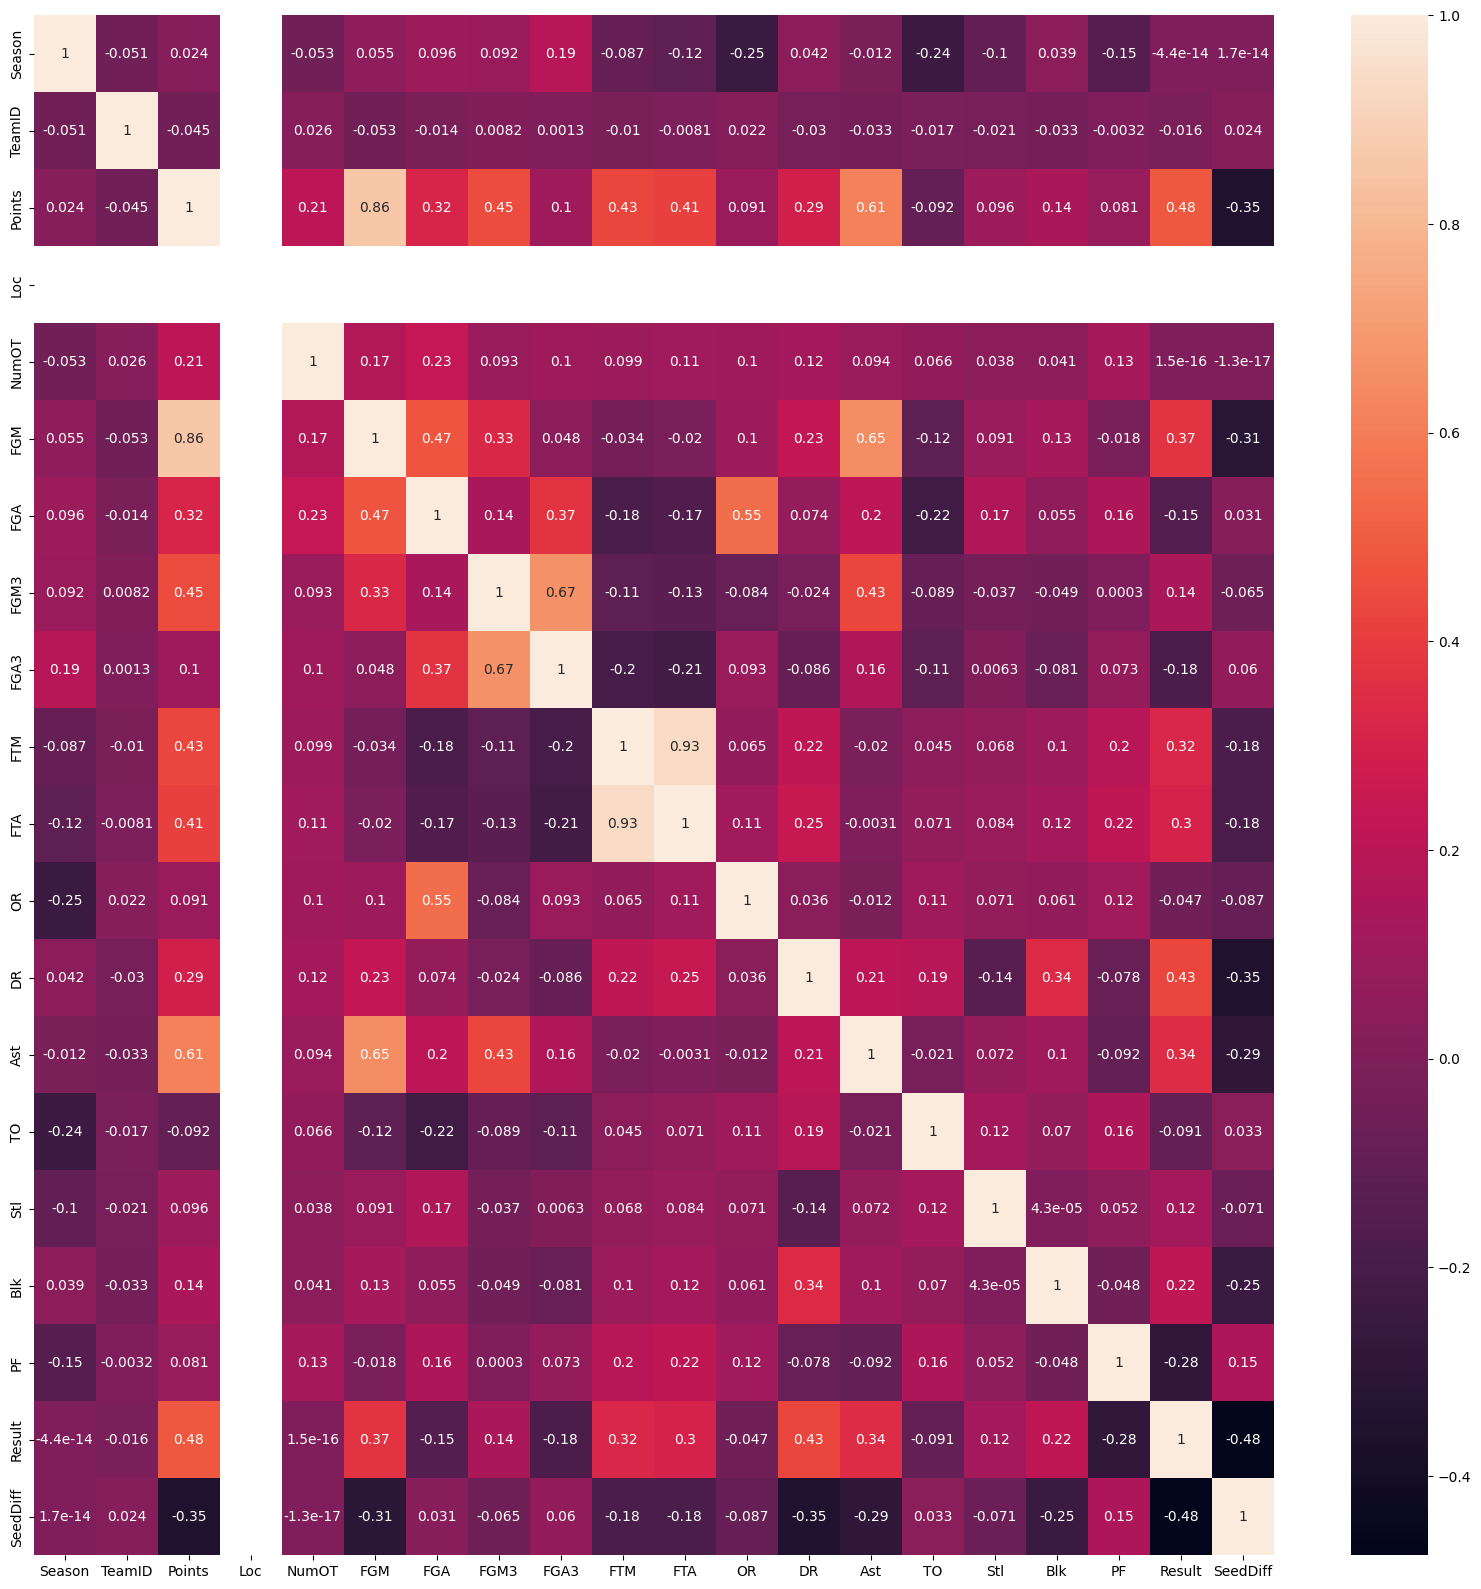

In [26]:
# See corealtion between Result and all other columns in FilteredTourneysTeams in heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(FilteredTourneyTeams.corr(), annot=True)
plt.show()

# From FilteredTourneyTeams drop columns that have correlation less than 0.1 with Result
# FilteredTourneyTeams = FilteredTourneyTeams.drop(columns=['NumOT', 'Loc', 'FGA', 'FGA3', 'FTA', 'OR', 'DR', 'PF'])

In [27]:
# to FilteredRegularTeams add a new column called SeedDiff and default it's value to 0
FilteredRegularTeams.loc[:, 'SeedDiff'] = 0

display(FilteredRegularTeams)

,Season,TeamID,Points,Loc,NumOT,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,Result,SeedDiff
0,2003,1104,68,0,0,27,58,3,14,11,18,14,24,13,23,7,1,22,1,0
1,2003,1272,70,0,0,26,62,8,20,10,19,15,28,16,13,4,4,18,1,0
2,2003,1266,73,0,0,24,58,8,18,17,29,17,26,15,10,5,2,25,1,0
3,2003,1296,56,0,0,18,38,3,9,17,31,6,19,11,12,14,2,18,1,0
4,2003,1400,77,0,0,30,61,6,14,11,13,17,22,12,14,4,4,20,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117743,2025,1102,62,-1,0,23,49,7,23,9,17,2,24,12,8,3,3,24,0,0
117744,2025,1139,63,-1,0,24,55,6,23,9,14,4,31,12,20,5,2,12,0,0
117745,2025,1480,62,-1,0,27,61,4,18,4,8,6,23,13,13,2,2,18,0,0
117746,2025,1122,68,-1,0,20,59,11,32,17,22,7,22,12,10,2,5,17,0,0


In [61]:
print(FilteredRegularTeams.columns.values)
print(FilteredTourneyTeams.columns.values)


['Season' 'TeamID' 'Points' 'Loc' 'NumOT' 'FGM' 'FGA' 'FGM3' 'FGA3' 'FTM'
 'FTA' 'OR' 'DR' 'Ast' 'TO' 'Stl' 'Blk' 'PF' 'Result' 'SeedDiff'
 'TotalGames']
['Season' 'TeamID' 'Points' 'Loc' 'NumOT' 'FGM' 'FGA' 'FGM3' 'FGA3' 'FTM'
 'FTA' 'OR' 'DR' 'Ast' 'TO' 'Stl' 'Blk' 'PF' 'Result' 'SeedDiff'
 'TotalGames']


# Adding Ratios and Removing the True Values of FGM,FGA,FGM3,FGA3,FTM,FTA

In [28]:
# Cell 2: Feature Engineering (Calculate Percentages)
FilteredRegularTeams['FGP'] = FilteredRegularTeams['FGM'] / FilteredRegularTeams['FGA']
FilteredRegularTeams['FG3P'] = FilteredRegularTeams['FGM3'] / FilteredRegularTeams['FGA3']
FilteredRegularTeams['FTP'] = FilteredRegularTeams['FTM'] / FilteredRegularTeams['FTA']

FilteredTourneyTeams['FGP'] = FilteredTourneyTeams['FGM'] / FilteredTourneyTeams['FGA']
FilteredTourneyTeams['FG3P'] = FilteredTourneyTeams['FGM3'] / FilteredTourneyTeams['FGA3']
FilteredTourneyTeams['FTP'] = FilteredTourneyTeams['FTM'] / FilteredTourneyTeams['FTA']

# Handle division by zero errors, if any.
FilteredRegularTeams.replace([float('inf'), float('-inf')], 0, inplace=True)
FilteredRegularTeams.fillna(0, inplace=True)

FilteredTourneyTeams.replace([float('inf'), float('-inf')], 0, inplace=True)
FilteredTourneyTeams.fillna(0, inplace=True)

print("\nFeature Engineering Completed.")

display(FilteredRegularTeams)
display(FilteredTourneyTeams)


Feature Engineering Completed.


,Season,TeamID,Points,Loc,NumOT,FGM,FGA,FGM3,FGA3,FTM,...,Ast,TO,Stl,Blk,PF,Result,SeedDiff,FGP,FG3P,FTP
0,2003,1104,68,0,0,27,58,3,14,11,...,13,23,7,1,22,1,0,0.465517,0.214286,0.611111
1,2003,1272,70,0,0,26,62,8,20,10,...,16,13,4,4,18,1,0,0.419355,0.400000,0.526316
2,2003,1266,73,0,0,24,58,8,18,17,...,15,10,5,2,25,1,0,0.413793,0.444444,0.586207
3,2003,1296,56,0,0,18,38,3,9,17,...,11,12,14,2,18,1,0,0.473684,0.333333,0.548387
4,2003,1400,77,0,0,30,61,6,14,11,...,12,14,4,4,20,1,0,0.491803,0.428571,0.846154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117743,2025,1102,62,-1,0,23,49,7,23,9,...,12,8,3,3,24,0,0,0.469388,0.304348,0.529412
117744,2025,1139,63,-1,0,24,55,6,23,9,...,12,20,5,2,12,0,0,0.436364,0.260870,0.642857
117745,2025,1480,62,-1,0,27,61,4,18,4,...,13,13,2,2,18,0,0,0.442623,0.222222,0.500000
117746,2025,1122,68,-1,0,20,59,11,32,17,...,12,10,2,5,17,0,0,0.338983,0.343750,0.772727


,Season,TeamID,Points,Loc,NumOT,FGM,FGA,FGM3,FGA3,FTM,...,Ast,TO,Stl,Blk,PF,Result,SeedDiff,FGP,FG3P,FTP
0,2003,1421,92,0,1,32,69,11,29,17,...,17,12,5,3,22,1,0,0.463768,0.379310,0.653846
1,2003,1112,80,0,0,31,66,7,23,11,...,22,16,10,7,8,1,-15,0.469697,0.304348,0.785714
2,2003,1113,84,0,0,31,59,6,14,16,...,18,9,7,4,19,1,3,0.525424,0.428571,0.727273
3,2003,1141,79,0,0,29,53,3,7,18,...,15,18,13,1,19,1,5,0.547170,0.428571,0.720000
4,2003,1143,76,0,1,27,64,7,20,15,...,17,13,8,2,14,1,-1,0.421875,0.350000,0.652174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,2024,1181,64,0,0,19,59,5,20,21,...,11,9,4,5,23,0,-7,0.322034,0.250000,0.807692
1378,2024,1397,66,0,0,24,62,11,26,7,...,17,6,8,4,25,0,1,0.387097,0.423077,0.636364
1379,2024,1104,72,0,0,26,58,11,23,9,...,9,7,2,5,15,0,3,0.448276,0.478261,0.818182
1380,2024,1301,50,0,0,21,57,5,19,3,...,10,11,8,3,13,0,10,0.368421,0.263158,0.750000


In [29]:
# From both FilteredRegularTeams and FilteredTourneyTeams drop columns ['FGM', 'FGA', 'FGM3', 'FGA
# 'FTM', 'FTA'] as they are not needed anymore
FilteredRegularTeams = FilteredRegularTeams.drop(columns=['FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA'])
FilteredTourneyTeams = FilteredTourneyTeams.drop(columns=['FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA'])

display(FilteredRegularTeams)
display(FilteredTourneyTeams)

,Season,TeamID,Points,Loc,NumOT,OR,DR,Ast,TO,Stl,Blk,PF,Result,SeedDiff,FGP,FG3P,FTP
0,2003,1104,68,0,0,14,24,13,23,7,1,22,1,0,0.465517,0.214286,0.611111
1,2003,1272,70,0,0,15,28,16,13,4,4,18,1,0,0.419355,0.400000,0.526316
2,2003,1266,73,0,0,17,26,15,10,5,2,25,1,0,0.413793,0.444444,0.586207
3,2003,1296,56,0,0,6,19,11,12,14,2,18,1,0,0.473684,0.333333,0.548387
4,2003,1400,77,0,0,17,22,12,14,4,4,20,1,0,0.491803,0.428571,0.846154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117743,2025,1102,62,-1,0,2,24,12,8,3,3,24,0,0,0.469388,0.304348,0.529412
117744,2025,1139,63,-1,0,4,31,12,20,5,2,12,0,0,0.436364,0.260870,0.642857
117745,2025,1480,62,-1,0,6,23,13,13,2,2,18,0,0,0.442623,0.222222,0.500000
117746,2025,1122,68,-1,0,7,22,12,10,2,5,17,0,0,0.338983,0.343750,0.772727


,Season,TeamID,Points,Loc,NumOT,OR,DR,Ast,TO,Stl,Blk,PF,Result,SeedDiff,FGP,FG3P,FTP
0,2003,1421,92,0,1,14,30,17,12,5,3,22,1,0,0.463768,0.379310,0.653846
1,2003,1112,80,0,0,11,36,22,16,10,7,8,1,-15,0.469697,0.304348,0.785714
2,2003,1113,84,0,0,10,27,18,9,7,4,19,1,3,0.525424,0.428571,0.727273
3,2003,1141,79,0,0,11,20,15,18,13,1,19,1,5,0.547170,0.428571,0.720000
4,2003,1143,76,0,1,18,20,17,13,8,2,14,1,-1,0.421875,0.350000,0.652174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,2024,1181,64,0,0,10,27,11,9,4,5,23,0,-7,0.322034,0.250000,0.807692
1378,2024,1397,66,0,0,6,17,17,6,8,4,25,0,1,0.387097,0.423077,0.636364
1379,2024,1104,72,0,0,7,21,9,7,2,5,15,0,3,0.448276,0.478261,0.818182
1380,2024,1301,50,0,0,6,22,10,11,8,3,13,0,10,0.368421,0.263158,0.750000


# Checking Corelation 

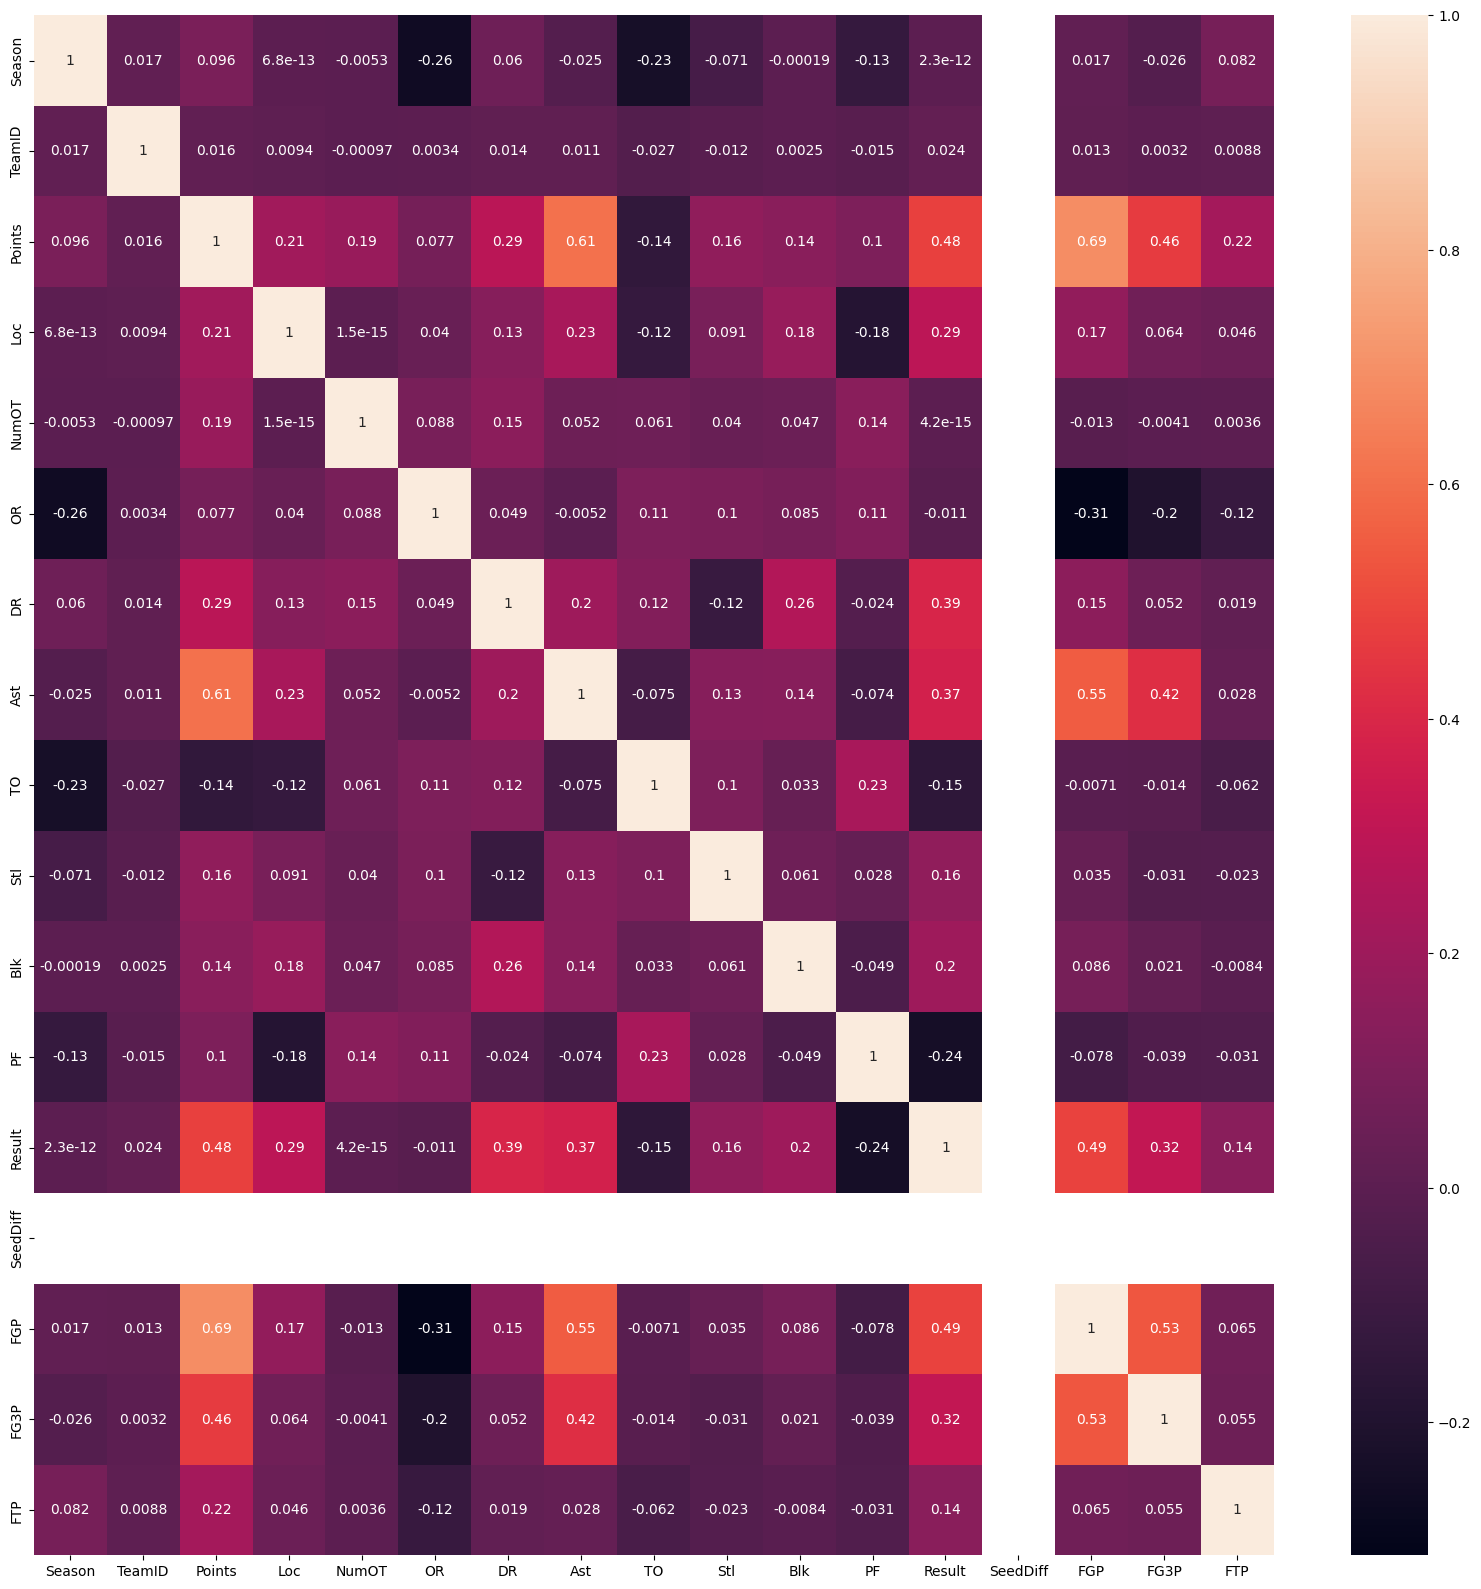

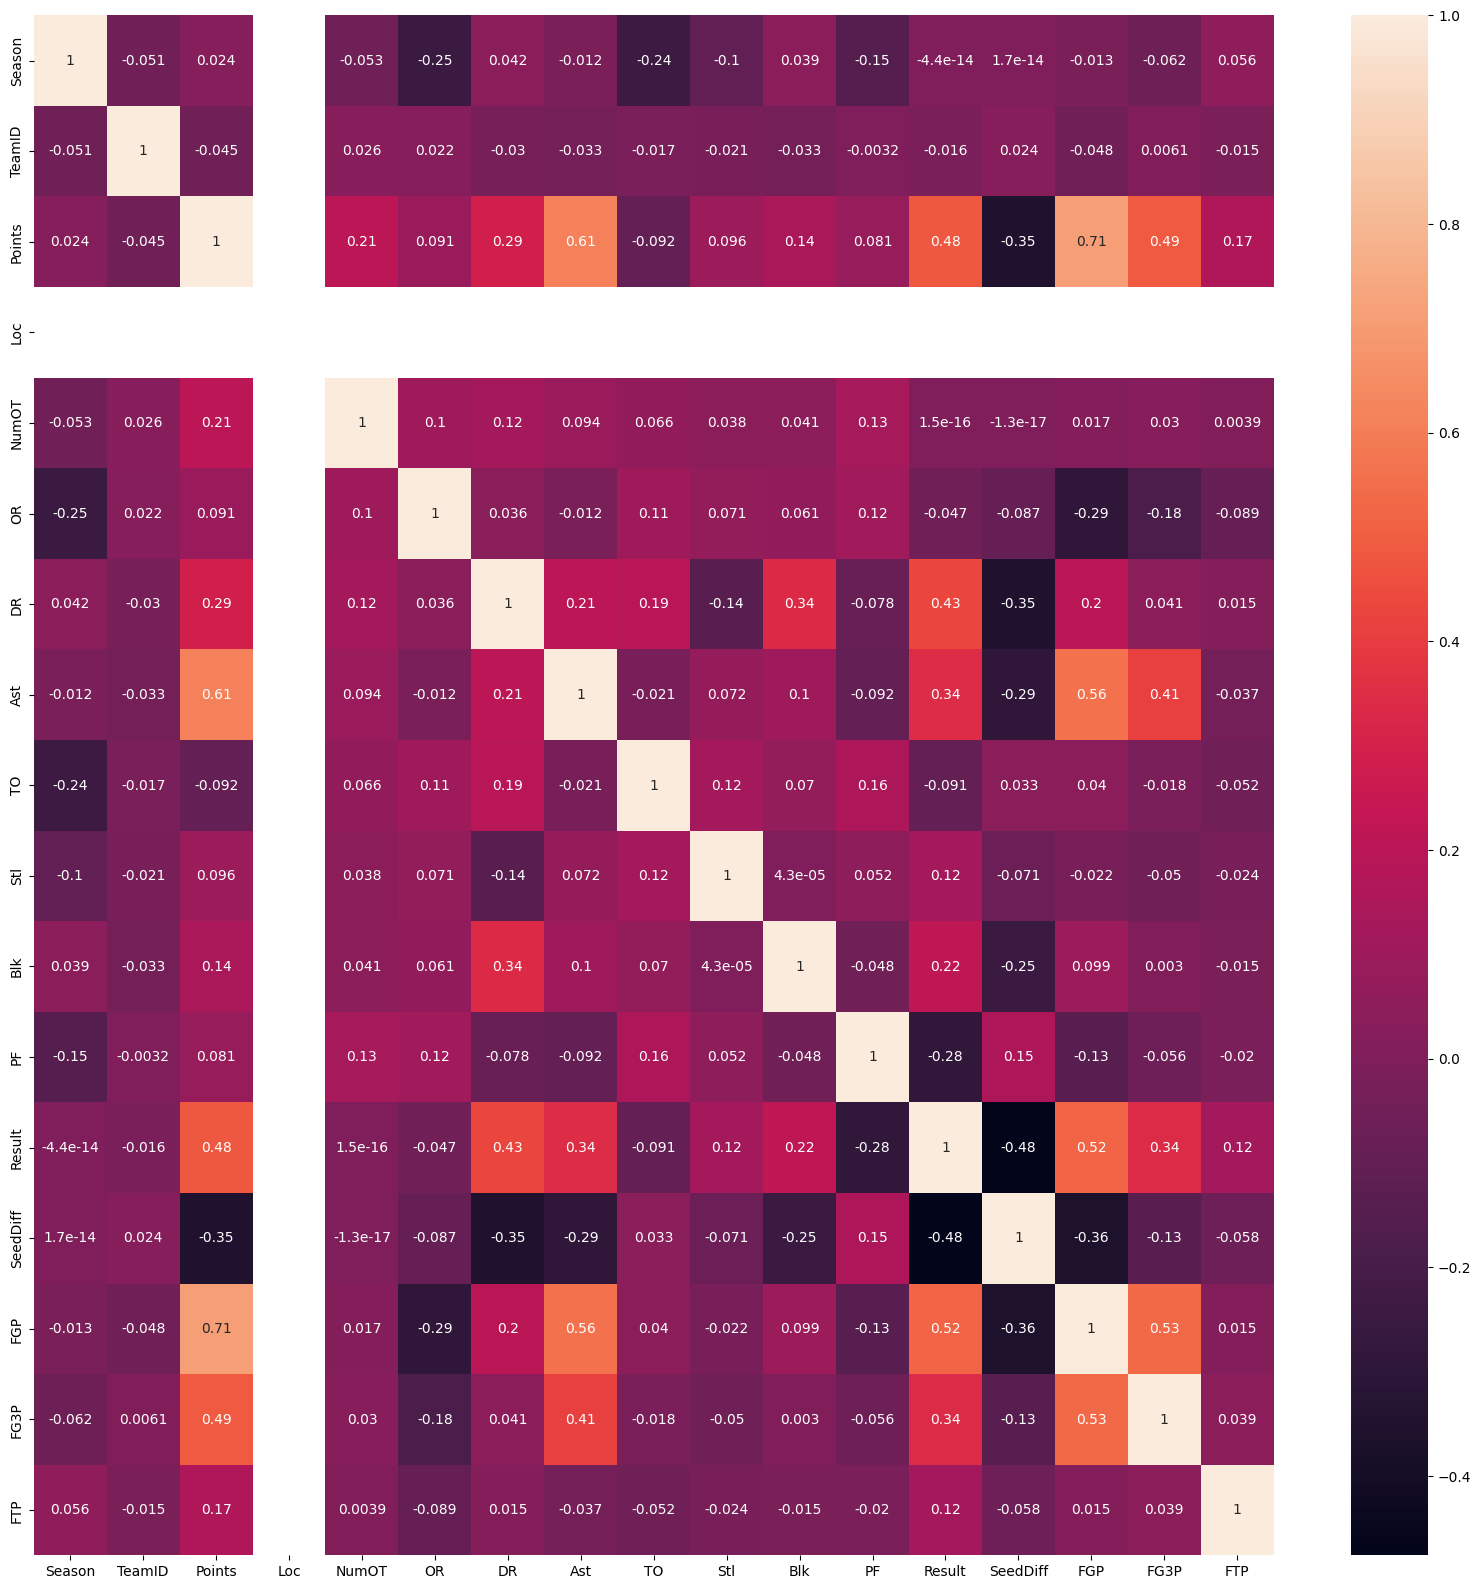

In [30]:
#Check the corelation between columns in FilteredRegularTeams and FilteredTourneyTeams
plt.figure(figsize=(20, 20))
sns.heatmap(FilteredRegularTeams.corr(), annot=True)
plt.show()

plt.figure(figsize=(20, 20))
sns.heatmap(FilteredTourneyTeams.corr(), annot=True)
plt.show()

In [125]:
display(FilteredRegularTeams)
display(FilteredTourneyTeams)

,Season,TeamID,Points,Loc,NumOT,OR,DR,Ast,TO,Stl,Blk,PF,Result,SeedDiff,FGP,FG3P,FTP
0,2003,1104,68,0,0,14,24,13,23,7,1,22,1,0,0.465517,0.214286,0.611111
1,2003,1272,70,0,0,15,28,16,13,4,4,18,1,0,0.419355,0.400000,0.526316
2,2003,1266,73,0,0,17,26,15,10,5,2,25,1,0,0.413793,0.444444,0.586207
3,2003,1296,56,0,0,6,19,11,12,14,2,18,1,0,0.473684,0.333333,0.548387
4,2003,1400,77,0,0,17,22,12,14,4,4,20,1,0,0.491803,0.428571,0.846154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117743,2025,1102,62,-1,0,2,24,12,8,3,3,24,0,0,0.469388,0.304348,0.529412
117744,2025,1139,63,-1,0,4,31,12,20,5,2,12,0,0,0.436364,0.260870,0.642857
117745,2025,1480,62,-1,0,6,23,13,13,2,2,18,0,0,0.442623,0.222222,0.500000
117746,2025,1122,68,-1,0,7,22,12,10,2,5,17,0,0,0.338983,0.343750,0.772727


,Season,TeamID,Points,Loc,NumOT,OR,DR,Ast,TO,Stl,Blk,PF,Result,SeedDiff,FGP,FG3P,FTP
0,2003,1421,92,0,1,14,30,17,12,5,3,22,1,0,0.463768,0.379310,0.653846
1,2003,1112,80,0,0,11,36,22,16,10,7,8,1,-15,0.469697,0.304348,0.785714
2,2003,1113,84,0,0,10,27,18,9,7,4,19,1,3,0.525424,0.428571,0.727273
3,2003,1141,79,0,0,11,20,15,18,13,1,19,1,5,0.547170,0.428571,0.720000
4,2003,1143,76,0,1,18,20,17,13,8,2,14,1,-1,0.421875,0.350000,0.652174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,2024,1181,64,0,0,10,27,11,9,4,5,23,0,-7,0.322034,0.250000,0.807692
1378,2024,1397,66,0,0,6,17,17,6,8,4,25,0,1,0.387097,0.423077,0.636364
1379,2024,1104,72,0,0,7,21,9,7,2,5,15,0,3,0.448276,0.478261,0.818182
1380,2024,1301,50,0,0,6,22,10,11,8,3,13,0,10,0.368421,0.263158,0.750000


# Concat both FilteredRegularTeams and FilteredTourneyTeams

In [31]:
# concat both FilteredRegularTeams and FilteredTourneyTeams
FilteredTeams = pd.concat([FilteredRegularTeams, FilteredTourneyTeams])

# save FilteredTeams to a csv file
# FilteredTeams.to_csv('FilteredTeams.csv', index=False)

In [103]:
display(FilteredTeams)

,Season,TeamID,Points,Loc,NumOT,OR,DR,Ast,TO,Stl,Blk,PF,Result,SeedDiff,TotalGames,FGP,FG3P,FTP
0,2012,1183,39,-1,0,5,15,9,21,6,3,18,0,0,27,0.340426,0.000000,0.636364
1,2008,1246,67,-1,0,8,23,16,13,3,3,13,1,0,30,0.509804,0.500000,0.800000
2,2020,1386,61,-1,0,5,20,8,13,4,0,16,0,0,32,0.313433,0.285714,0.700000
3,2015,1311,78,-1,1,14,26,14,16,10,2,20,0,0,26,0.406780,0.320000,0.628571
4,2016,1423,85,-1,0,11,22,20,11,9,6,28,1,0,30,0.530303,0.333333,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236054,2022,1410,87,0,0,5,27,15,11,3,2,21,0,0,29,0.546875,0.294118,0.600000
236055,2025,1374,67,-1,0,12,26,7,10,11,4,15,0,0,25,0.333333,0.222222,0.809524
236056,2014,1294,63,-1,0,13,25,7,10,2,1,23,0,0,29,0.378788,0.333333,0.700000
236057,2019,1387,55,0,0,15,25,13,6,6,8,11,1,0,35,0.372881,0.181818,0.466667


In [112]:
print(FilteredTeams.columns.values)

['Season' 'TeamID' 'Points' 'Loc' 'NumOT' 'OR' 'DR' 'Ast' 'TO' 'Stl' 'Blk'
 'PF' 'Result' 'SeedDiff' 'TotalGames' 'FGP' 'FG3P' 'FTP']


# Heatmap of FilteredTeams based on Result

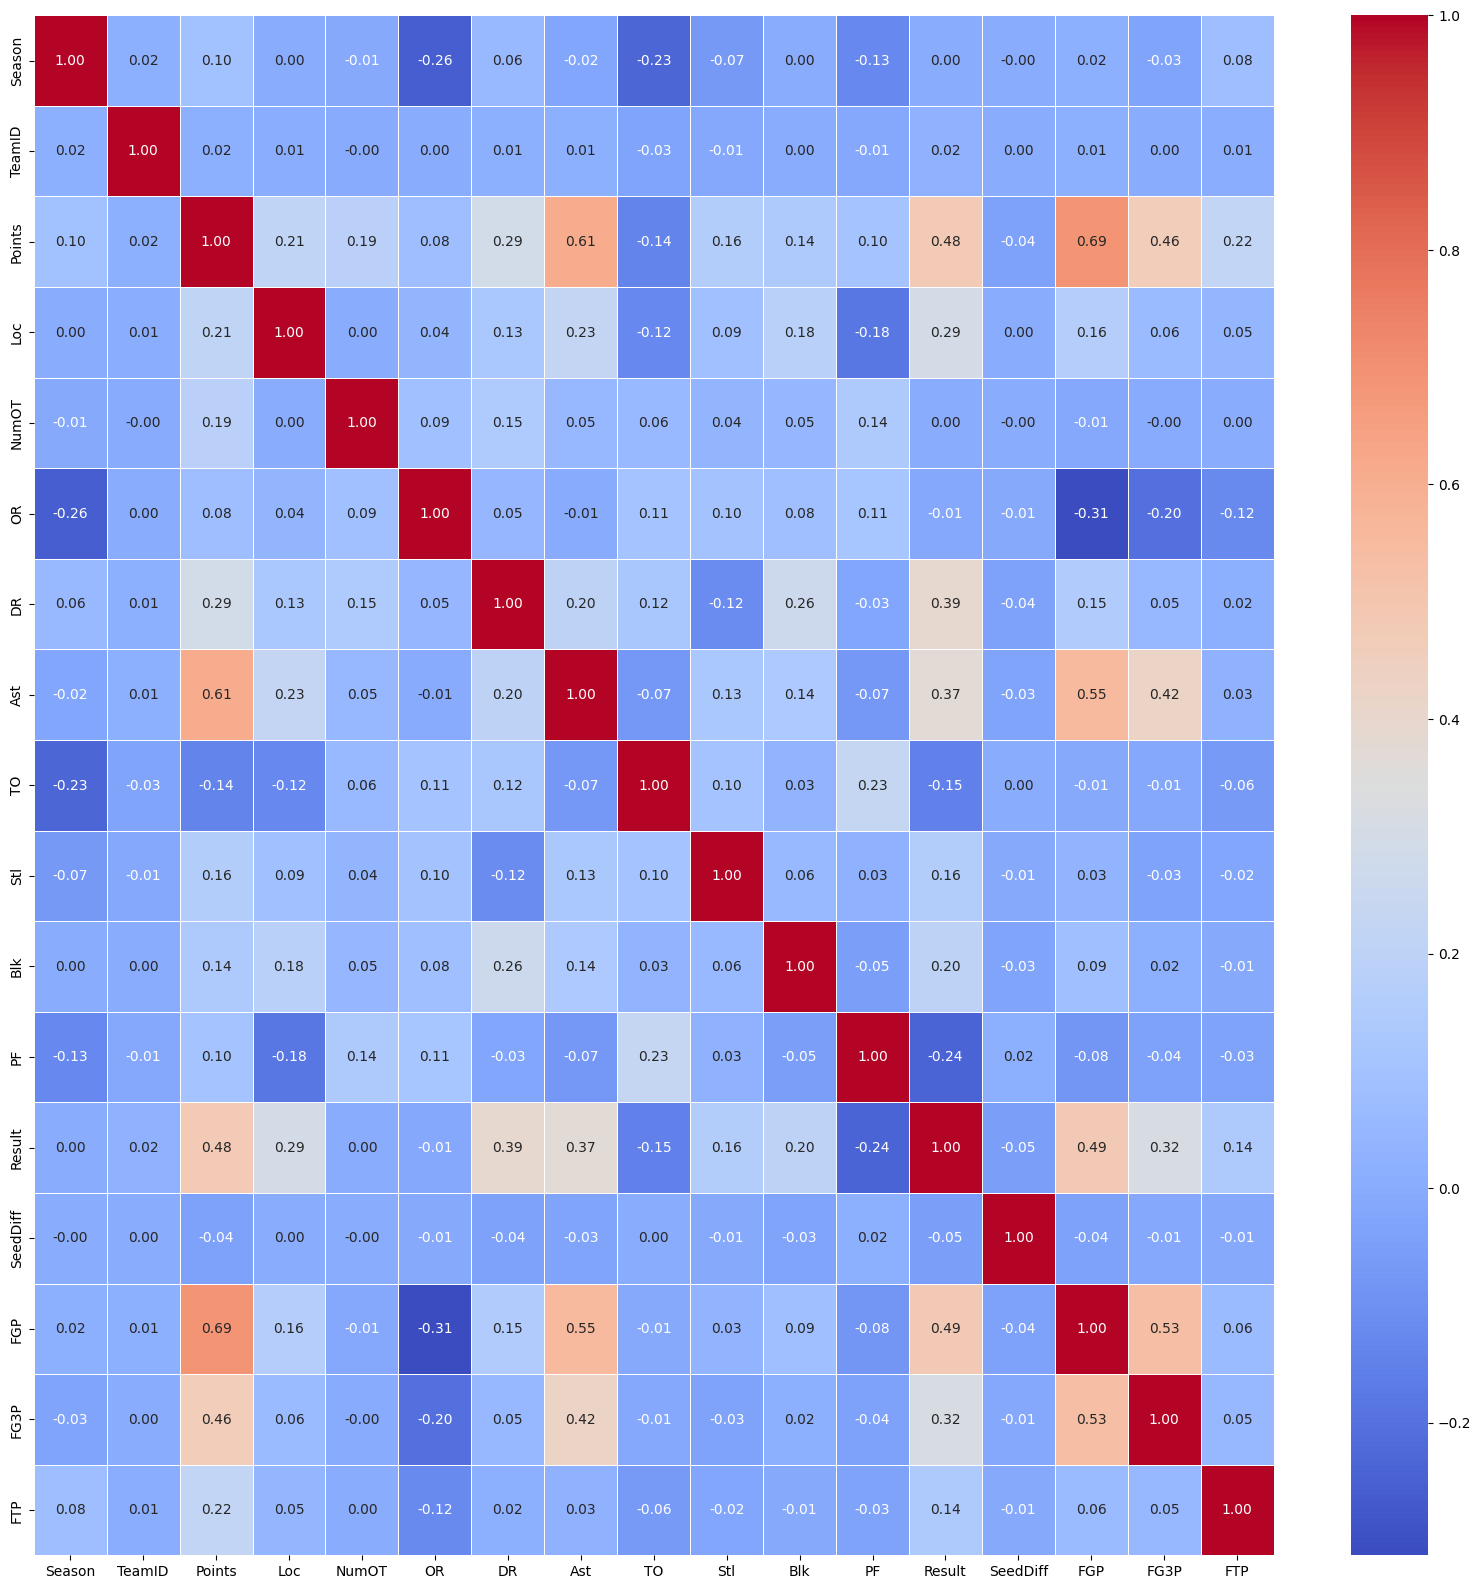

In [32]:
# Heatmap of FilteredTeams based on Result
plt.figure(figsize=(20, 20))

sns.heatmap(FilteredTeams.corr(),  cmap="coolwarm", fmt=".2f", linewidths=0.5,annot=True)
plt.show()



# Creating FilteredTeams_grouped 

In [66]:
FilteredTeams_grouped = FilteredTeams.drop(columns=['Season']).groupby('TeamID').mean()

# Drop the result column (assuming it's named 'Result')
FilteredTeams_grouped = FilteredTeams_grouped.drop(columns=['Result'])

display(FilteredTeams_grouped)  # Check new dataset


,Points,Loc,NumOT,OR,DR,Ast,TO,Stl,Blk,PF,SeedDiff,FGP,FG3P,FTP
TeamID,,,,,,,,,,,,,,
1101,69.556604,-0.116352,0.075472,8.493711,21.380503,13.427673,13.204403,7.943396,2.327044,20.977987,0.084906,0.436421,0.348331,0.714183
1102,63.749249,0.082583,0.039039,6.809309,20.963964,13.713213,12.028529,6.150150,2.282282,17.370871,0.021021,0.451621,0.355433,0.690585
1103,72.173239,0.052113,0.076056,10.523944,23.614085,13.688732,12.530986,6.340845,3.377465,18.525352,0.069014,0.445715,0.355420,0.694333
1104,73.391069,0.159675,0.069012,11.485792,25.161028,12.918809,13.270636,6.671177,4.516915,17.978349,-0.056834,0.447448,0.338765,0.698810
1105,64.785256,-0.168269,0.064103,11.235577,23.040064,11.480769,15.068910,6.950321,3.514423,19.482372,0.000000,0.399721,0.298882,0.658825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,65.788235,-0.200000,0.047059,6.152941,22.670588,12.658824,12.341176,6.435294,2.623529,15.858824,0.000000,0.424164,0.337777,0.718602
1477,67.471910,-0.202247,0.168539,7.662921,20.146067,13.359551,12.786517,7.022472,3.719101,17.797753,0.000000,0.421533,0.306216,0.669948
1478,70.907407,-0.277778,0.129630,7.314815,23.000000,14.314815,11.685185,6.925926,2.592593,17.611111,0.000000,0.431418,0.327557,0.732877


# Divide the data set into test and train data sets before that randomize the columns

In [67]:
# Divide the data set into test and train data sets before that randomize the columns
FilteredTeams = FilteredTeams.sample(frac=1).reset_index(drop=True)

# Split the data into train and test data
train_data = FilteredTeams[FilteredTeams['Season'] < 2025]
test_data = FilteredTeams[FilteredTeams['Season'] == 2025]

# Drop Season column from both train and test data
train_data = train_data.drop(columns=['Season'])
test_data = test_data.drop(columns=['Season'])

display(train_data)
display(test_data)

,TeamID,Points,Loc,NumOT,OR,DR,Ast,TO,Stl,Blk,PF,Result,SeedDiff,FGP,FG3P,FTP
0,1359,66,0,0,7,17,10,6,9,1,20,0,0,0.482143,0.100000,0.588235
1,1258,71,1,0,6,25,11,12,3,1,21,0,0,0.446809,0.346154,0.800000
2,1386,64,1,0,4,28,17,20,10,4,16,1,0,0.442308,0.333333,0.538462
3,1156,61,-1,0,8,23,8,18,6,5,18,0,0,0.385965,0.300000,0.846154
4,1325,51,-1,0,4,22,12,15,3,4,20,0,0,0.382979,0.583333,0.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238255,1389,57,0,0,12,22,15,14,4,4,20,0,0,0.462963,0.181818,0.555556
238256,1240,82,1,0,6,16,18,14,7,0,18,1,0,0.574468,0.733333,0.944444
238257,1398,67,-1,0,10,21,11,13,6,2,10,0,0,0.375000,0.285714,0.650000
238258,1241,61,-1,0,7,24,11,26,2,1,27,0,0,0.488372,0.444444,0.625000


,TeamID,Points,Loc,NumOT,OR,DR,Ast,TO,Stl,Blk,PF,Result,SeedDiff,FGP,FG3P,FTP
32,1298,63,0,0,10,26,10,8,5,2,20,0,0,0.318182,0.258065,0.812500
76,1123,60,0,0,5,23,7,3,1,0,17,0,0,0.407407,0.280000,0.450000
114,1374,96,1,0,12,22,20,13,13,4,18,1,0,0.539683,0.423077,0.772727
204,1353,57,-1,0,6,20,5,11,6,7,11,0,0,0.461538,0.210526,0.714286
207,1403,94,1,0,10,27,17,11,7,6,12,1,0,0.571429,0.533333,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238124,1306,59,-1,0,8,25,8,9,6,2,18,0,0,0.372881,0.208333,0.555556
238130,1408,59,1,0,6,27,11,13,7,5,12,1,0,0.396226,0.318182,0.666667
238144,1191,43,-1,0,10,20,5,13,2,3,22,0,0,0.290909,0.115385,0.533333
238210,1411,58,1,0,11,21,8,15,12,8,17,0,0,0.278689,0.277778,0.826087


# XGBoost Model Training

In [68]:
from xgboost import XGBClassifier

# Randomize rows before splitting
FilteredTeams = FilteredTeams.sample(frac=1).reset_index(drop=True)

# Split the data into train and test sets based on Season
train_data = FilteredTeams[FilteredTeams['Season'] < 2025].drop(columns=['Season'])
test_data = FilteredTeams[FilteredTeams['Season'] == 2025].drop(columns=['Season'])

# Define features and labels
X_train = train_data.drop(columns=['Result'])  # Drop target column
y_train = train_data['Result']  # Target (win/loss)

X_test = test_data.drop(columns=['Result'])
y_test = test_data['Result']

# Drop TeamID form X_train and X_test
X_train = X_train.drop(columns=['TeamID'])
X_test = X_test.drop(columns=['TeamID'])

# Train XGBoost model
model = XGBClassifier(n_estimators=500, learning_rate=0.05)
model.fit(X_train, y_train)

print("XGBoost Model Trained!")

# Accuracy
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")


XGBoost Model Trained!
Accuracy: 0.8504548480142001


In [39]:
print(model.predict_proba(X_test)[:10])  # Check first 10 predictions


[[0.68957305 0.31042692]
 [0.78486615 0.21513386]
 [0.9778089  0.0221911 ]
 [0.9588799  0.0411201 ]
 [0.3260166  0.6739834 ]
 [0.96269214 0.03730783]
 [0.1335854  0.8664146 ]
 [0.8937603  0.10623967]
 [0.01847941 0.9815206 ]
 [0.03836173 0.9616383 ]]


# Model for TeamID1 and TeamID2 data Retrival from FilteredTeams_grouped and getting TeamID1 dominance over TeamID2

In [69]:
display(FilteredTeams_grouped.loc[1101])
display(FilteredTeams_grouped.loc[1102])
display(FilteredTeams_grouped.loc[1101] - FilteredTeams_grouped.loc[1102])


Points      69.556604
Loc         -0.116352
NumOT        0.075472
OR           8.493711
DR          21.380503
Ast         13.427673
TO          13.204403
Stl          7.943396
Blk          2.327044
PF          20.977987
SeedDiff     0.084906
FGP          0.436421
FG3P         0.348331
FTP          0.714183
Name: 1101, dtype: float64

Points      63.749249
Loc          0.082583
NumOT        0.039039
OR           6.809309
DR          20.963964
Ast         13.713213
TO          12.028529
Stl          6.150150
Blk          2.282282
PF          17.370871
SeedDiff     0.021021
FGP          0.451621
FG3P         0.355433
FTP          0.690585
Name: 1102, dtype: float64

Points      5.807355
Loc        -0.198935
NumOT       0.036433
OR          1.684401
DR          0.416539
Ast        -0.285540
TO          1.175874
Stl         1.793246
Blk         0.044762
PF          3.607117
SeedDiff    0.063885
FGP        -0.015200
FG3P       -0.007102
FTP         0.023597
dtype: float64

# Checking wheather X_train and FilteredTeams_grouped have same column values

In [41]:
print(X_train.columns.values)
print(FilteredTeams_grouped.columns.values)

['Points' 'Loc' 'NumOT' 'OR' 'DR' 'Ast' 'TO' 'Stl' 'Blk' 'PF' 'SeedDiff'
 'FGP' 'FG3P' 'FTP']
['Points' 'Loc' 'NumOT' 'OR' 'DR' 'Ast' 'TO' 'Stl' 'Blk' 'PF' 'SeedDiff'
 'FGP' 'FG3P' 'FTP']


# Predicting TeamID1 winning over TeamID2

In [70]:
def predict_match(TeamID1, TeamID2, model, grouped_df, feature_columns):
    # Get stats for both teams
    team1_stats = grouped_df.loc[TeamID1].drop(['TeamID', 'Season'], errors='ignore')
    team2_stats = grouped_df.loc[TeamID2].drop(['TeamID', 'Season'], errors='ignore')

    # Align feature order with training data
    team1_stats = team1_stats.reindex(feature_columns, fill_value=0).values
    team2_stats = team2_stats.reindex(feature_columns, fill_value=0).values

    # Compute feature differences
    feature_diff = np.array(team1_stats - team2_stats).reshape(1, -1)

    # Predict win probability
    win_prob = model.predict_proba(feature_diff)[0][1]
    
    print(f"Win Probability of Team {TeamID1} over Team {TeamID2}: {win_prob}")

# Call function with correct feature columns
predict_match(1101,1480, model, FilteredTeams_grouped, X_train.columns)


Win Probability of Team 1101 over Team 1480: 0.00048354684258811176


# Load sample submission file and divide the Season, TeamID1 and TeamID2 for getting predictions

In [71]:
# Load sample submission file
folder = 'data/'
sample_submission = pd.read_csv(folder+"SampleSubmissionStage2.csv")

# Extract TeamID1, TeamID2, and Season from ID
sample_submission[['Season', 'TeamID1', 'TeamID2']] = sample_submission['ID'].str.split('_', expand=True)
sample_submission[['TeamID1', 'TeamID2']] = sample_submission[['TeamID1', 'TeamID2']].astype(int)

display(sample_submission.head())

# Drop unnecessary columns and filter for 2025 season
sample_submission = sample_submission.drop(columns=['ID', 'Pred'])
sample_submission = sample_submission[sample_submission['Season'] == '2025']
sample_submission = sample_submission.drop(columns=['Season'])

display(sample_submission)


,ID,Pred,Season,TeamID1,TeamID2
0,2025_1101_1102,0.5,2025,1101,1102
1,2025_1101_1103,0.5,2025,1101,1103
2,2025_1101_1104,0.5,2025,1101,1104
3,2025_1101_1105,0.5,2025,1101,1105
4,2025_1101_1106,0.5,2025,1101,1106


,TeamID1,TeamID2
0,1101,1102
1,1101,1103
2,1101,1104
3,1101,1105
4,1101,1106
...,...,...
131402,3477,3479
131403,3477,3480
131404,3478,3479
131405,3478,3480


# Selecting the first 66066 rows which represent then Men TeamID's

In [72]:
# save the first 66065 rows of sample_submission in a variable
submission = sample_submission[:66066]

print(submission)

       TeamID1  TeamID2
0         1101     1102
1         1101     1103
2         1101     1104
3         1101     1105
4         1101     1106
...        ...      ...
66061     1477     1479
66062     1477     1480
66063     1478     1479
66064     1478     1480
66065     1479     1480

[66066 rows x 2 columns]


# Predicting the TeamID's Matchups

In [73]:
# Predict win probability for each row in submission and save it in a new column called 'Pred' in submission
def predict(row):
    return model.predict_proba(np.array(FilteredTeams_grouped.loc[row['TeamID1']] - FilteredTeams_grouped.loc[row['TeamID2']]).reshape(1, -1))[0][1]

submission['Pred'] = submission.apply(predict, axis=1)

display(submission)

C:\Users\ravit\AppData\Local\Temp\ipykernel_11136\3674283294.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Pred'] = submission.apply(predict, axis=1)


,TeamID1,TeamID2,Pred
0,1101,1102,0.000378
1,1101,1103,0.000378
2,1101,1104,0.000378
3,1101,1105,0.000556
4,1101,1106,0.000484
...,...,...,...
66061,1477,1479,0.000769
66062,1477,1480,0.000556
66063,1478,1479,0.000556
66064,1478,1480,0.000556


In [75]:
# Multiply the Pred column by 1000 
submission['Pred'] = submission['Pred'] * 1000



C:\Users\ravit\AppData\Local\Temp\ipykernel_11136\1987593587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Pred'] = submission['Pred'] * 1000


In [76]:
# save the submission to a csv file
submission.to_csv('submission02.csv', index=False)

# End of the Code 
--------------------------------------------------------------

In [ ]:
import numpy as np

def predict_match(TeamID1, TeamID2, model, grouped_df, feature_columns):
    # Get stats for both teams
    team1_stats = grouped_df.loc[TeamID1].reindex(feature_columns, fill_value=0)
    team2_stats = grouped_df.loc[TeamID2].reindex(feature_columns, fill_value=0)

    # Compute feature differences (matching model training structure)
    feature_diff = (team1_stats - team2_stats).values.reshape(1, -1)

    # Ensure feature shape matches training data
    if feature_diff.shape[1] != len(feature_columns):
        raise ValueError(f"Feature shape mismatch, expected: {len(feature_columns)}, got: {feature_diff.shape[1]}")

    # Predict win probability
    win_prob = model.predict_proba(feature_diff)[0][1]

    print(f"Win Probability of Team {TeamID1} over Team {TeamID2}: {win_prob}")


# Call function with correct feature columns
predict_match(1310,1320, model, FilteredTeams_grouped, X_train.columns)


Win Probability of Team 1310 over Team 1320: 0.0055394284427165985


In [152]:
def predict_match(TeamID1, TeamID2, model, grouped_df, feature_columns):
    # Get stats for both teams
    team1_stats = grouped_df.loc[TeamID1]
    team2_stats = grouped_df.loc[TeamID2]

    # Align feature order with training data
    team1_stats = team1_stats.reindex(feature_columns, fill_value=0).values
    team2_stats = team2_stats.reindex(feature_columns, fill_value=0).values

    # Compute feature differences
    feature_diff = (team1_stats - team2_stats).reshape(1, -1)

    win_prob = model.predict_proba(feature_diff)[0][1]

    # Predict win probability
    display(team1_stats)
    display(team2_stats)
    display(feature_diff)

    
    print(f"Win Probability of Team {TeamID1} over Team {TeamID2}: {win_prob}")

# Call function with correct feature columns
predict_match(1101, 1102, model, FilteredTeams_grouped, X_train.columns)


AttributeError: 'Sequential' object has no attribute 'predict_proba'

In [ ]:
##############################################################

In [129]:
import pandas as pd




# Shuffle dataset before splitting
FilteredTeams = FilteredTeams.sample(frac=1).reset_index(drop=True)

# Split into train (before 2025) and test (2025 season)
train_data = FilteredTeams[FilteredTeams['Season'] < 2025].drop(columns=['Season'])
test_data = FilteredTeams[FilteredTeams['Season'] == 2025].drop(columns=['Season'])

# Drop columns Season and TeamID from both train and test data
train_data = train_data.drop(columns=['TeamID'])
test_data = test_data.drop(columns=['TeamID'])



display(train_data)
display(test_data)


,Points,Loc,NumOT,OR,DR,Ast,TO,Stl,Blk,PF,Result,SeedDiff,FGP,FG3P,FTP
0,59,-1,0,13,25,13,16,7,3,20,0,0,0.385965,0.263158,0.555556
2,58,1,0,10,14,7,6,5,5,21,0,0,0.416667,0.400000,0.521739
3,69,1,0,12,30,11,17,5,3,20,0,0,0.423729,0.240000,0.565217
4,92,-1,0,12,31,20,12,6,3,26,1,0,0.523077,0.448276,0.733333
5,75,0,0,13,28,17,16,12,2,22,1,0,0.442623,0.400000,0.684211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238254,77,-1,0,7,25,21,10,5,1,9,1,0,0.508772,0.444444,0.777778
238255,85,1,0,12,35,14,9,9,6,17,1,0,0.456140,0.263158,0.756757
238256,72,-1,0,10,21,12,17,9,3,25,1,0,0.431818,0.157895,0.756098
238257,75,1,0,9,14,19,8,10,1,12,1,0,0.509091,0.440000,0.500000


,Points,Loc,NumOT,OR,DR,Ast,TO,Stl,Blk,PF,Result,SeedDiff,FGP,FG3P,FTP
1,79,1,0,8,18,17,5,9,6,11,1,0,0.480769,0.437500,0.758621
29,65,1,1,5,26,10,13,6,4,16,1,0,0.403226,0.321429,0.545455
59,70,-1,0,11,20,17,15,5,5,12,0,0,0.529412,0.428571,0.666667
66,66,-1,1,12,34,7,18,8,3,13,0,0,0.333333,0.208333,0.772727
72,68,-1,0,4,21,14,14,11,6,13,1,0,0.444444,0.333333,0.785714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238167,95,0,0,8,19,15,11,8,5,14,1,0,0.531250,0.450000,0.750000
238203,103,0,0,10,30,17,6,7,4,19,1,0,0.523077,0.370370,0.781250
238249,67,-1,0,13,19,13,22,5,5,19,0,0,0.396825,0.347826,0.818182
238250,75,1,0,9,22,9,8,3,2,16,0,0,0.465517,0.238095,0.761905


In [130]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Prepare training and testing data
X_train = train_data.drop(columns=['Result'])
y_train = train_data['Result']

X_test = test_data.drop(columns=['Result'])
y_test = test_data['Result']

# Train XGBoost model
model = xgb.XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

# Evaluate model accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.8435766585311737


In [6]:
# Merge team statistics for TeamID1
sample_submission = sample_submission.merge(FilteredTeams, left_on="TeamID1", right_on="TeamID", suffixes=("_T1", ""))
sample_submission = sample_submission.drop(columns=["TeamID"])

# Merge team statistics for TeamID2
sample_submission = sample_submission.merge(FilteredTeams, left_on="TeamID2", right_on="TeamID", suffixes=("_T1", "_T2"))
sample_submission = sample_submission.drop(columns=["TeamID"])

# Drop unused columns
sample_submission = sample_submission.drop(columns=['Result_T1', 'Result_T2'])

# Ensure column order matches training data
X_submission = sample_submission[X_train.columns]

# Predict probability for TeamID1 winning over TeamID2
predictions = model.predict_proba(X_submission)[:, 1]


MemoryError: Unable to allocate 207. GiB for an array with shape (27782029442,) and data type int64

In [ ]:
# Create final submission format
sample_submission['Prediction'] = predictions
sample_submission['ID'] = '2025_' + sample_submission['TeamID1'].astype(str) + '_' + sample_submission['TeamID2'].astype(str)
sample_submission = sample_submission[['ID', 'Prediction']]

# Display and save
display(sample_submission)
sample_submission.to_csv('submission.csv', index=False)


Accuracy:  0.8207233192811183


,Feature,Importance
11,FGP,0.264652
0,Points,0.194131
4,DR,0.185463
9,PF,0.081470
1,Loc,0.073750
5,Ast,0.059355
12,FG3P,0.035483
7,Stl,0.033745
6,TO,0.023717
8,Blk,0.016722


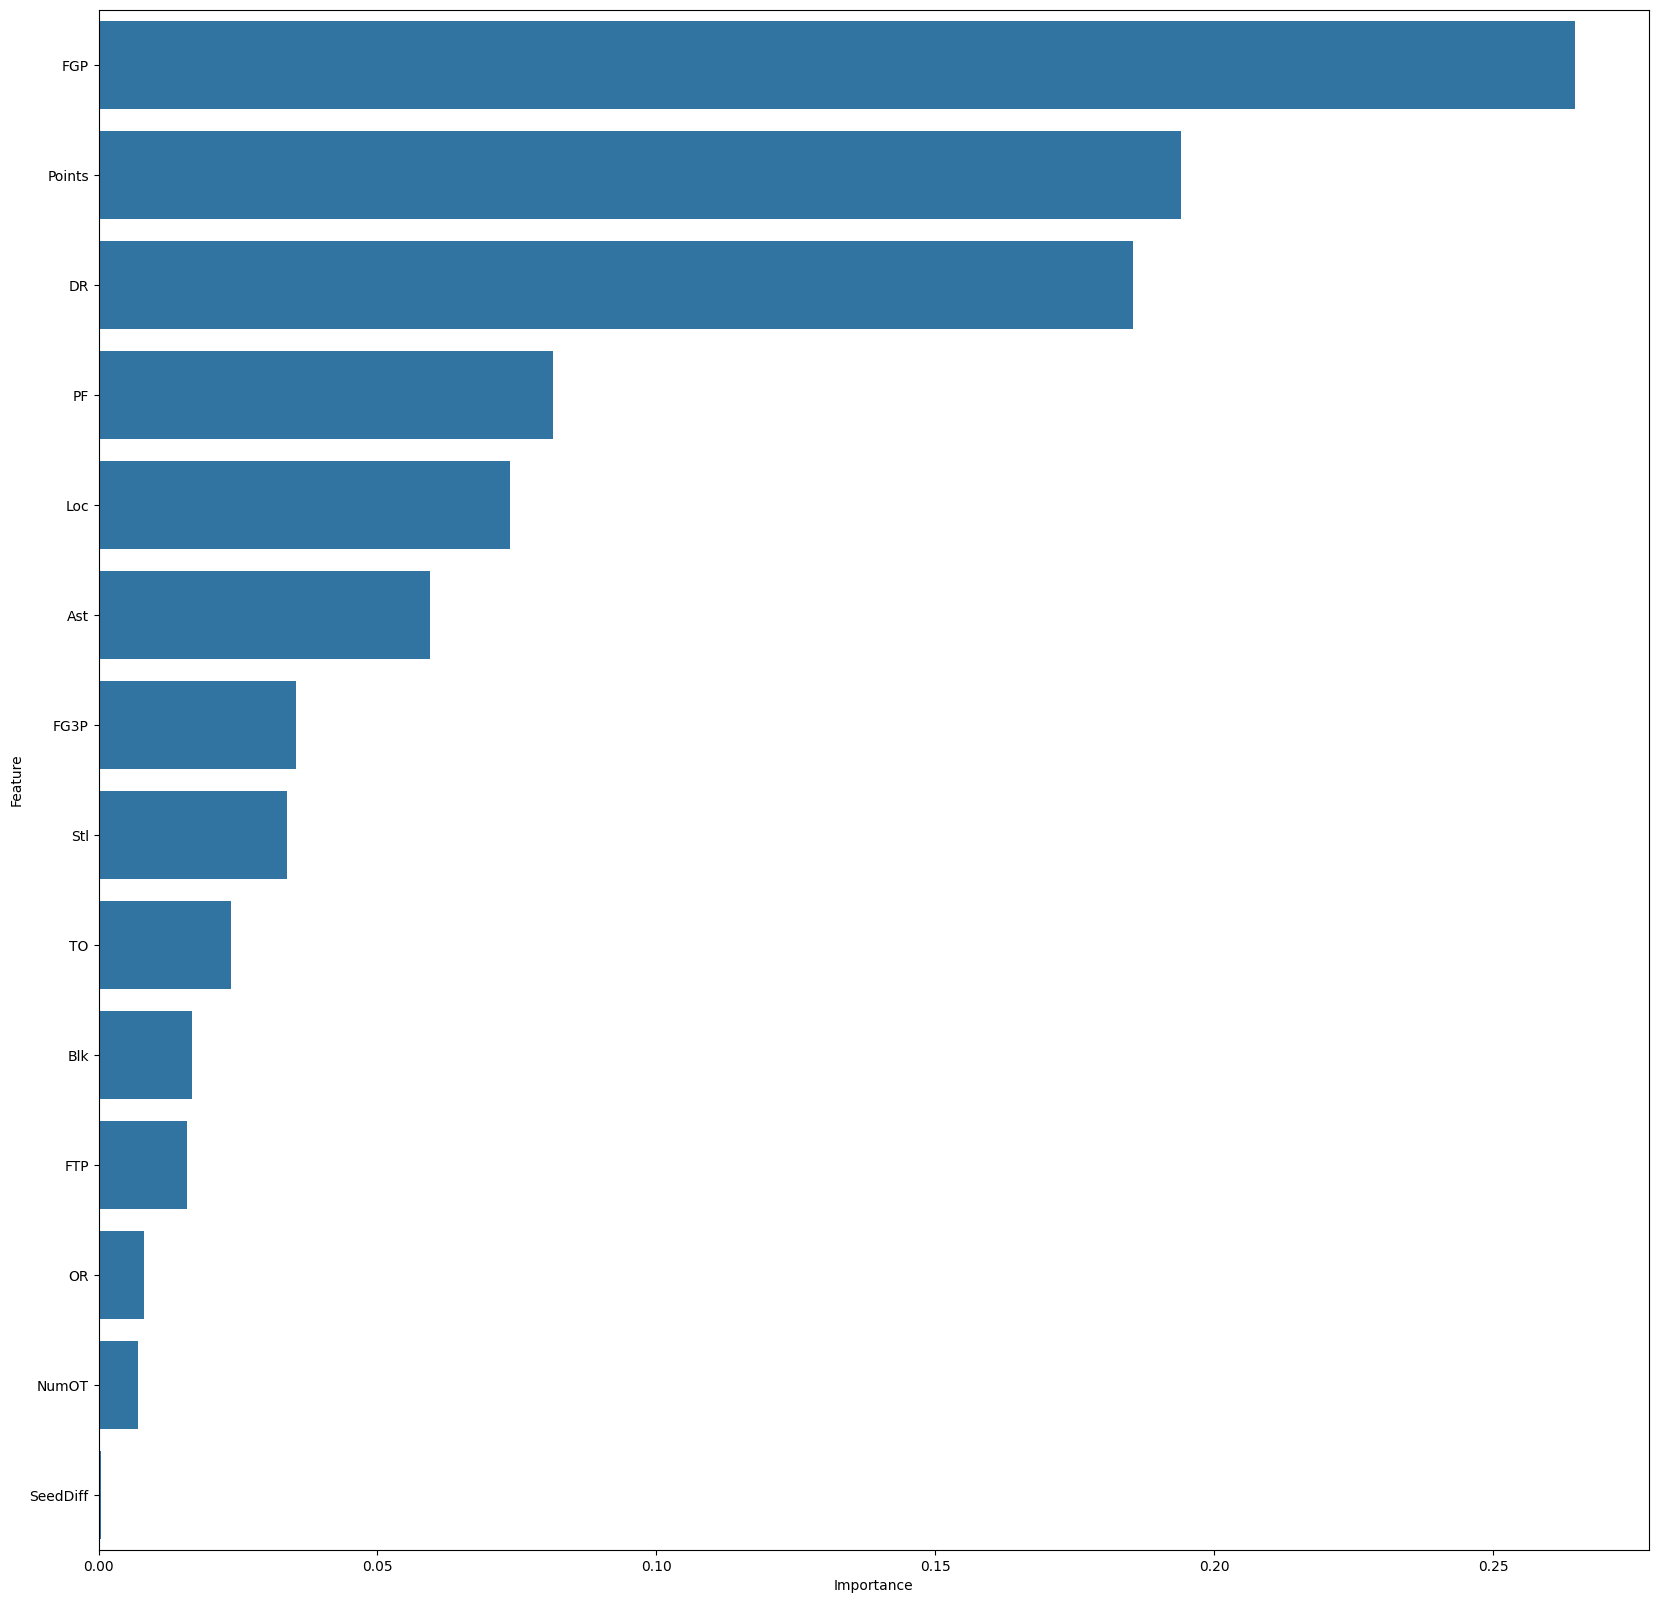

In [131]:
# Apply the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train = train_data.drop(columns=['Result'])
y_train = train_data['Result']

X_test = test_data.drop(columns=['Result'])
y_test = test_data['Result']

model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: ", accuracy)

# Get the feature Importance
feature_importance = model.feature_importances_
features = X_train.columns

feature_importance_df = pd.DataFrame()
feature_importance_df['Feature'] = features
feature_importance_df['Importance'] = feature_importance

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

display(feature_importance_df)

# View it in graph
plt.figure(figsize=(20, 20))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.show()



In [ ]:
sample_submission = pd.read_csv(folder+"SampleSubmissionStage2.csv")

# Extract TeamID1, TeamID2, and Season from ID
sample_submission[['Season', 'TeamID1', 'TeamID2']] = sample_submission['ID'].str.split('_', expand=True)
sample_submission[['TeamID1', 'TeamID2']] = sample_submission[['TeamID1', 'TeamID2']].astype(int)

display(sample_submission.head())

#drop ID column, Season column and Prediction column from sample_submission
sample_submission = sample_submission.drop(columns=['ID','Pred'])

# Remove all the rows where Season is not equal to 2025
sample_submission = sample_submission[sample_submission['Season'] == '2025']

# Drop Season column from sample_submission
sample_submission = sample_submission.drop(columns=['Season'])

display(sample_submission)




,ID,Pred,Season,TeamID1,TeamID2
0,2025_1101_1102,0.5,2025,1101,1102
1,2025_1101_1103,0.5,2025,1101,1103
2,2025_1101_1104,0.5,2025,1101,1104
3,2025_1101_1105,0.5,2025,1101,1105
4,2025_1101_1106,0.5,2025,1101,1106


,TeamID1,TeamID2
0,1101,1102
1,1101,1103
2,1101,1104
3,1101,1105
4,1101,1106
...,...,...
131402,3477,3479
131403,3477,3480
131404,3478,3479
131405,3478,3480


0  2025_1101_1102        0.232408
1  2025_1101_1103        0.232408
2  2025_1101_1104        0.232408
3  2025_1101_1105        0.232408
4  2025_1101_1106        0.232408
5  2025_1101_1107        0.232408
6  2025_1101_1108        0.232408
7  2025_1101_1110        0.232408
8  2025_1101_1111        0.232408
9  2025_1101_1112        0.232408

In [132]:
# Apply GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: ", accuracy)

Accuracy:  0.8433547814510761


In [25]:
# Cross validate the data using KFold
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=32)

accuracy = 0

for train_index, test_index in kf.split(FilteredTeams):
    train_data = FilteredTeams.iloc[train_index]
    test_data = FilteredTeams.iloc[test_index]
    
    X_train = train_data.drop(columns=['Result'])
    y_train = train_data['Result']

    X_test = test_data.drop(columns=['Result'])
    y_test = test_data['Result']

    model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy += accuracy_score(y_test, y_pred)

accuracy /= 10

print("Accuracy: ", accuracy)


Accuracy:  0.8251157443968726
